## Data-X Mindful Project
### Part 2 Data analysis and modeling

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

from IPython.display import Image, display
import random

### Read data files

In [2]:
X = pd.read_csv('X_df.csv').drop('Unnamed: 0',axis=1)
Y = pd.read_csv('Y_df.csv').drop('Unnamed: 0',axis=1)

### Normalization

In [3]:
scaler = MinMaxScaler()
norm_X = scaler.fit_transform(X)
new_Y = Y.Depressed
X_train, X_test, y_train, y_test = train_test_split(norm_X, new_Y, test_size=0.1)

/Users/daveliu/.local/share/virtualenvs/daveliu-o5npLomY/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Initial trial with different classifiers

In [4]:
# LogisticRegressionCV
clf = LogisticRegressionCV(penalty = 'l2', solver='liblinear', multi_class='ovr').fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
#y_pred_train = clf.predict(X_train)
#y_pred_test = clf.predict(X_test)
#clf.predict_proba(X_test)
#recall_score(y_test, y_pred_test, average='micro')
#precision_score(y_test, y_pred_test, average='micro')
#confusion_matrix(y_train, y_pred_train)
#confusion_matrix(y_test, y_pred_test)

0.8313253012048193
0.7


/Users/daveliu/.local/share/virtualenvs/daveliu-o5npLomY/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [5]:
# Random Forest
clf = RandomForestClassifier(n_estimators=100, max_depth=3,
                              random_state=80)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9156626506024096
0.9


In [6]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=3,min_samples_leaf=1)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
#cross_val_score(clf, X_test, y_test, cv=10)

0.7951807228915663
0.8


### Gradient Boost

In [7]:
ENTITY_TYPE = "Gradient Boost"

clf = GradientBoostingClassifier(n_estimators=15, max_depth=5)
clf.fit(X_train, y_train)
print("Train: ", clf.score(X_train, y_train))
print("Test: ", clf.score(X_test, y_test))
print("Features used:", len(clf.feature_importances_))
print("-----")

importance_pairs = zip(X.columns, clf.feature_importances_)
sorted_importance_pairs = sorted(importance_pairs, key=lambda k: k[1], reverse=True)
for k, v in sorted_importance_pairs[:20]:
    print(k, "\t", v, "\n")

Train:  1.0
Test:  0.9
Features used: 100
-----
Neg_Total 	 0.37636009626141403 

Pos_Total 	 0.14838562521489332 

Hobby 	 0.09372177055103885 

Previous_Relationship 	 0.08342267488608955 

Dry_mouth 	 0.040753117124440554 

Snack 	 0.0307033988522521 

Happy 	 0.029645340354981644 

R_Complicated 	 0.023816279677648756 

Mood 	 0.023000919989142197 

Meal 	 0.02264015610877594 

Mood_Swing 	 0.02089448058449625 

F_None 	 0.016700590137290406 

Volunteering 	 0.012984654525933986 

Fried 	 0.010272109772273759 

Headache 	 0.008971859015766134 

Talk_2F 	 0.008508139305451051 

No 	 0.006907198173639124 

Unhealthy 	 0.005478482322688519 

Woke_onTime 	 0.005463537783873323 

Upset 	 0.0050489314808320985 



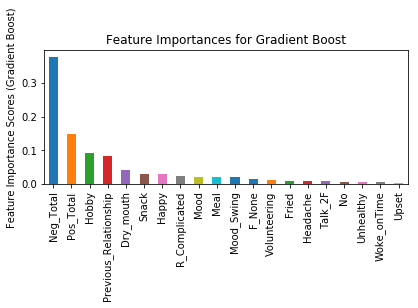

In [8]:
# Feature Importance
feat_imp = pd.Series(clf.feature_importances_, X.columns).sort_values(ascending=False).head(20)
feat_imp.plot(kind='bar', title='Feature Importances for ' + ENTITY_TYPE)
plt.ylabel('Feature Importance Scores' + " (" + ENTITY_TYPE + ")")
plt.tight_layout()
plt.show()

In [9]:
# Recall and Precision
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))

print('recall: ' + str(recall))
print('precision: ' +str(precision))
print("F1-Score: ", 2 * recall * precision / (recall + precision))

recall: 0.8
precision: 1.0
F1-Score:  0.888888888888889


### xgboost

Train:  1.0
Test:  0.7
Features used: 100
precision:  0.75
recall:  0.6
-----
0.7


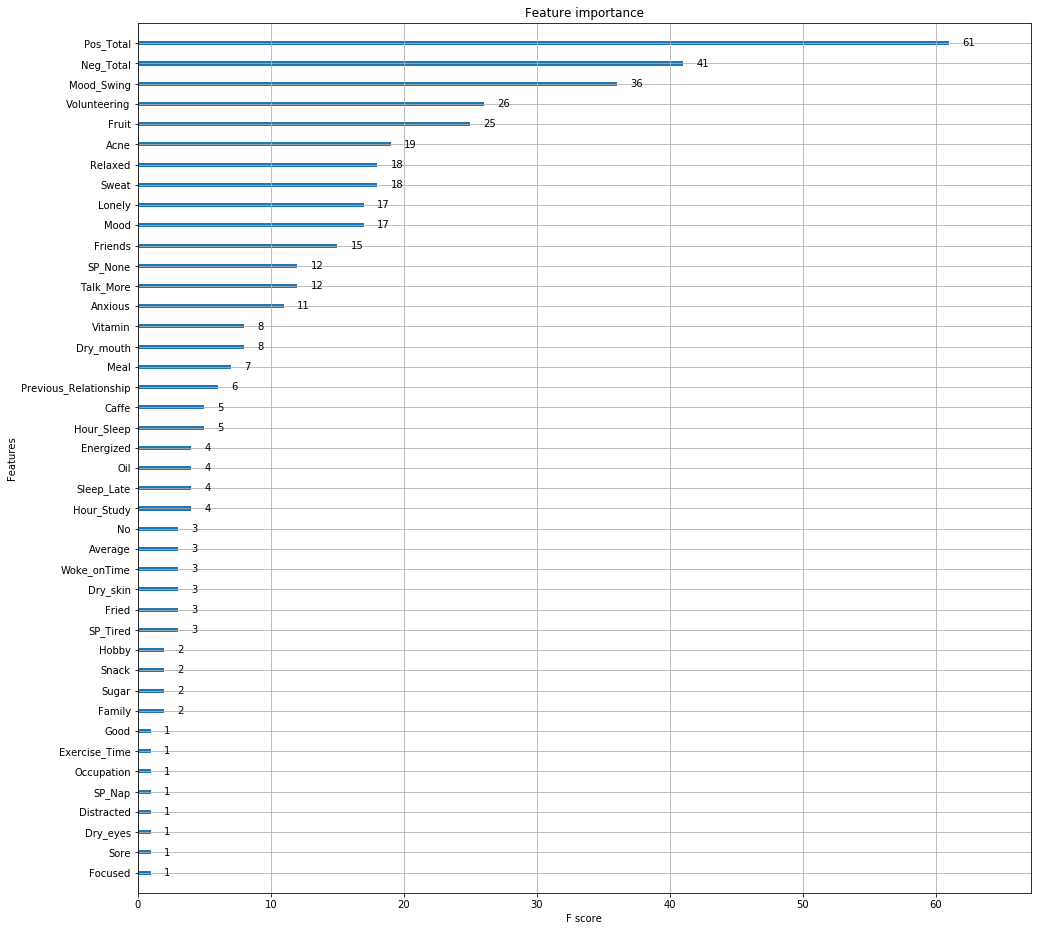

In [10]:
ENTITY_TYPE = "xgboost"

from xgboost import XGBClassifier
import xgboost

test_score = 0
precision, recall = 0,0
n = 1
for _ in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, new_Y, test_size=0.1)

    clf = XGBClassifier(estimators=20, max_depth = 5, eval_metric='aucpr')
    clf.fit(X_train, y_train)
    test_score += clf.score(X_test, y_test)
    recall += recall_score(y_test, clf.predict(X_test))
    precision += precision_score(y_test, clf.predict(X_test))

print("Train: ", clf.score(X_train, y_train))
print("Test: ", clf.score(X_test, y_test))
print("Features used:", len(clf.feature_importances_))
print("precision: ", precision/n)
print("recall: ", recall/n)
print("-----")
print(test_score/n)

fig, ax = plt.subplots(figsize=(16,16))
xgboost.plot_importance(clf,ax=ax)
plt.show()

Pos_Total 	 0.14628297 

Neg_Total 	 0.09832134 

Mood_Swing 	 0.086330935 

Volunteering 	 0.06235012 

Fruit 	 0.05995204 

Acne 	 0.04556355 

Sweat 	 0.043165468 

Relaxed 	 0.043165468 

Mood 	 0.040767387 

Lonely 	 0.040767387 

Friends 	 0.035971224 

SP_None 	 0.02877698 

Talk_More 	 0.02877698 

Anxious 	 0.026378896 

Vitamin 	 0.019184653 

Dry_mouth 	 0.019184653 

Meal 	 0.016786572 

Previous_Relationship 	 0.01438849 

Hour_Sleep 	 0.0119904075 

Caffe 	 0.0119904075 

Hour_Study 	 0.009592326 

Sleep_Late 	 0.009592326 

Oil 	 0.009592326 

Energized 	 0.009592326 

Woke_onTime 	 0.007194245 

SP_Tired 	 0.007194245 

Average 	 0.007194245 

Fried 	 0.007194245 

Dry_skin 	 0.007194245 

No 	 0.007194245 

Snack 	 0.004796163 

Hobby 	 0.004796163 

Family 	 0.004796163 

Sugar 	 0.004796163 

Occupation 	 0.0023980816 

Exercise_Time 	 0.0023980816 

SP_Nap 	 0.0023980816 

Good 	 0.0023980816 

Sore 	 0.0023980816 

Dry_eyes 	 0.0023980816 

Focused 	 0.0023980816 


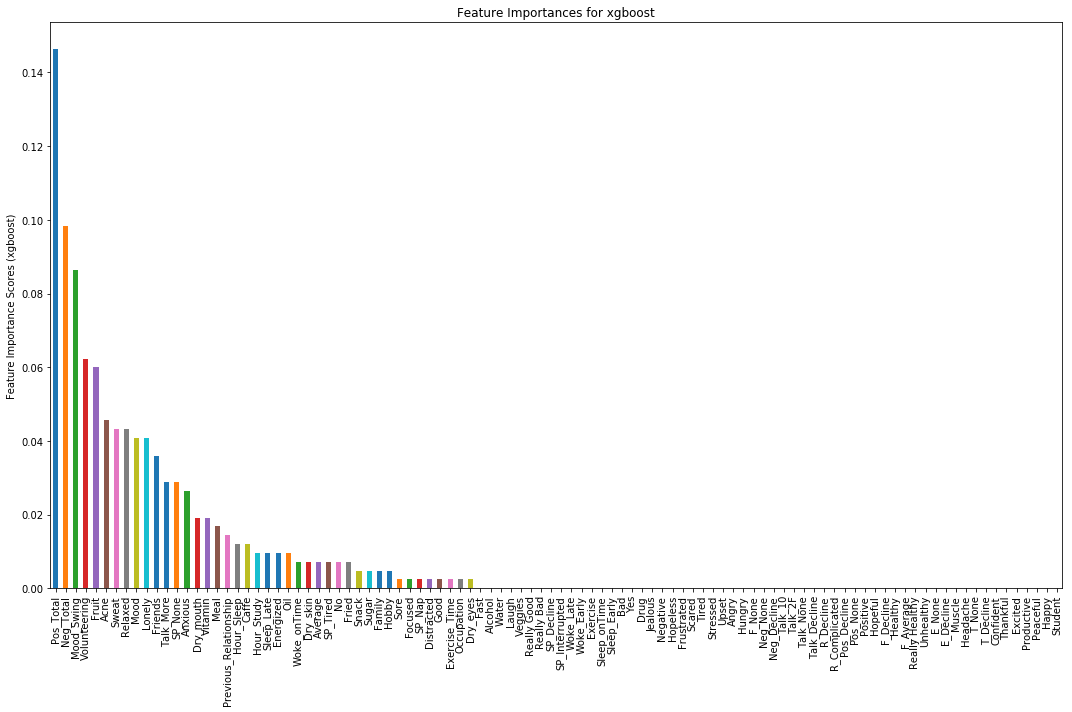

In [11]:
# Feature Importance
importance_pairs = zip(X_train.columns, clf.feature_importances_)
sorted_importance_pairs = sorted(importance_pairs, key=lambda k: k[1], reverse=True)
for k, v in sorted_importance_pairs:
    print(k, "\t", v, "\n")

feat_imp = pd.Series(clf.feature_importances_, X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15,10))
feat_imp.plot(kind='bar', title='Feature Importances for ' + ENTITY_TYPE)
plt.ylabel('Feature Importance Scores' + " (" + ENTITY_TYPE + ")")
plt.tight_layout()
plt.show()

In [12]:
# Recall and Precision
recall = recall_score(y_test, clf.predict(X_test))
precision = precision_score(y_test, clf.predict(X_test))

print('recall: ' + str(recall))
print('precision: ' +str(precision))
print("F1-Score: ", 2 * recall * precision / (recall + precision))

recall: 0.6
precision: 0.75
F1-Score:  0.6666666666666665


In [13]:
X_results = X.copy()
X_results["results"] = clf.predict(X)

In [14]:
# Average features
X_results_avg = X_results.groupby("results").mean()
X_results_avg.columns
X_results_avg.loc[:,["Fruit", "Water", "F_Average", "F_None", "F_Decline", "Healthy", "Unhealthy","Dry_mouth", "Dry_skin"]]

,Fruit,Water,F_Average,F_None,F_Decline,Healthy,Unhealthy,Dry_mouth,Dry_skin
results,,,,,,,,,
0,0.489362,0.765957,0.531915,0.042553,0.021277,0.319149,0.127660,0.276596,0.255319
1,0.478261,0.804348,0.456522,0.000000,0.000000,0.217391,0.304348,0.456522,0.347826


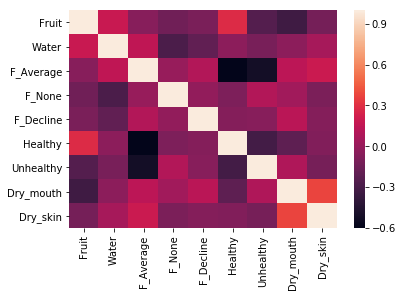

In [15]:
# Look at correlation between some features
features = ["Fruit", "Water", "F_Average", "F_None", "F_Decline", "Healthy", "Unhealthy","Dry_mouth", "Dry_skin"]
correlations = X.loc[:,features].corr()
sns.heatmap(correlations)
plt.show()

### Example Person

In [16]:
example_person = X.iloc[[15],:]
example_person

,Student,Occupation,Volunteering,Hour_Study,Hour_Sleep,Meal,Snack,Exercise,Exercise_Time,Laugh,...,Neg_Total,Talk_10,Talk_More,Talk_2F,Talk_None,Talk_Decline,R_Decline,R_Complicated,No,Yes
15,1,0,1,0,6,2,2,0,0,0,...,2,0,1,0,0,0,0,0,1,0


In [17]:
# Get average "non-Depressed", and this example person
X_results_avg.iloc[[0]].reset_index().drop("results", axis=1).append(example_person)

,Student,Occupation,Volunteering,Hour_Study,Hour_Sleep,Meal,Snack,Exercise,Exercise_Time,Laugh,...,Neg_Total,Talk_10,Talk_More,Talk_2F,Talk_None,Talk_Decline,R_Decline,R_Complicated,No,Yes
0,0.851064,0.425532,0.382979,33.93617,6.893617,2.276596,1.255319,0.531915,32.87234,0.914894,...,2.765957,0.978723,0.468085,0.765957,0.0,0.0,0.021277,0.042553,0.510638,0.425532
15,1.000000,0.000000,1.000000,0.00000,6.000000,2.000000,2.000000,0.000000,0.00000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000


In [18]:
# Get difference between average "non-Depressed" person, and this example person
example_difference = X_results_avg.iloc[[1]].reset_index().drop("results", axis=1).append(example_person).diff().iloc[[1]]
example_difference

,Student,Occupation,Volunteering,Hour_Study,Hour_Sleep,Meal,Snack,Exercise,Exercise_Time,Laugh,...,Neg_Total,Talk_10,Talk_More,Talk_2F,Talk_None,Talk_Decline,R_Decline,R_Complicated,No,Yes
15,0.108696,-0.347826,0.434783,-32.173913,-0.413043,-0.021739,0.717391,-0.5,-32.282609,-0.804348,...,-4.652174,-0.891304,0.521739,-0.695652,0.0,-0.065217,0.0,-0.108696,0.347826,-0.23913


In [32]:
# Weights and difference
weights_and_diff = pd.DataFrame(data=[feat_imp.values], columns=feat_imp.index).append(example_difference, sort=True)
weights_and_diff

,Acne,Alcohol,Angry,Anxious,Average,Bad,Caffe,Confident,Distracted,Drug,...,Unhealthy,Upset,Veggies,Vitamin,Volunteering,Water,Woke_Early,Woke_Late,Woke_onTime,Yes
0,0.045564,0.000000,0.000000,0.026379,0.007194,0.00000,0.011990,0.000000,0.002398,0.000000,...,0.000000,0.000000,0.000000,0.019185,0.062350,0.000000,0.00000,0.000000,0.007194,0.00000
15,0.347826,-0.021739,-0.173913,-0.782609,0.456522,-0.23913,-0.586957,-0.086957,-0.695652,-0.217391,...,0.695652,-0.456522,0.456522,0.695652,0.434783,0.195652,-0.26087,-0.304348,0.565217,-0.23913


In [20]:
weights_and_diff.iloc[0].multiply(weights_and_diff.iloc[1]).abs().sort_values(ascending=False).head(10)

Neg_Total        0.457408
Hour_Study       0.308623
Pos_Total        0.273486
Exercise_Time    0.077416
Friends          0.075070
Mood_Swing       0.043165
Fruit            0.031279
Lonely           0.028360
Volunteering     0.027109
Anxious          0.020644
dtype: float64

### Sample output and response

In [21]:
# Sample responses
responses = {
    
"Relaxed": "Mindfulness and meditation can really help overcome stressful times.",

"Hobby": "Find time for the things that make you happy! Reading, sports, music… Having a hobby really increases your quality of life. ",

"Sweat": "Do some intense exercise! Releasing some stress is always a good idea. ",

"Volunteering": "Have you considered engaging in some volunteering? Even the smallest effort can have huge impact!",

"SP_Late": "Watch out for your sleep habits! Having consistent sleep schedules is vital for getting a good night sleep. ",

"Snack": "Stop snacking all day! Comfort food is not the answer, eat a proper meal instead – I’m sure your cooking abilities are not that bad… 😉",

"Fruit": "Are you getting your daily vitamins? Fruit is a very important part of our diet, and it’s delicious! ",

"Water": "Drink some more water! We are 60% made of water, don’t let that percentage drop 😉",

"Lonely": "It’s normal to feel lonely sometimes, but it’s important to remember that there ARE people who care about us, and to keep in touch with them!",

"F_Average": "Maybe your food choices are not completely unhealthy, but don’t you think you could do better? Food impacts our mood more than you may think!",

"W_Late": "Get out of bed and take on the world! Waking up early and feeling productive is very comforting 🙂",

"Anxious": "Sometimes we are overwhelmed with projects, work, tasks… However, our mindset is very important in overcoming those situations. Tell yourself it’s going to be OK, you can do it!",

"Occupation": "Having an occupation makes us feel useful and is a self-esteem boost! Whether it’s your job, a class project, or housekeeping 😉",

"Energized": "It is very important to feel motivated and with energy! Every morning, think about the things that make you feel happy, excited and give you energy to make it successfully through the day!",

"W_Time": "Waking up on time and being prepared for all the tasks and commitments for the day is very comforting 🙂",

"Talk_2F": "How many friends do you have? And how many of them have you talk to recently? Make sure to keep in touch with the people that are important to us, it really makes us happier.",

"Average": "Watch out for your sleep habits! Having consistent sleep schedules, and relaxing before going to bed, is vital to get a good night sleep.",

"Oil": "Stop eating oily food! Comfort food is not the answer, if you give healthy food a try I’m sure it will make you feel better 😉",

"Sore": "Do some exercise! Is there a bigger feeling of accomplishment that being tired after an intense workout?",

"Fried": "Stop eating fried food! Comfort food is not the answer, if you give healthy food a try I’m sure it will make you feel better 😉",

"S_Late": "If only the day had more than 24 hours! However, staying up until late is not going to change that. Why don’t you try to go to sleep a little bit earlier? You’ll feel well rested the next day 😉",

"Veggies": "Veggies might not be your favourite food, I get that. But how good does it make us feel when we eat healthy and clean?",

"Thankful": "It is important to remember every day how lucky we are. Why don’t you try each morning to think about three things that you are grateful for?",

"Excited": "It is very important to feel motivated and excited! Every morning, think about the things that make you feel happy, excited and give you energy to make it successfully through the day!",

"Exercise": "Do some exercise! Releasing some stress is always a good idea.",

"Family": "Becoming a teenager, moving to a different city (or country!), always makes us become less attached to our family. Call your mom more often, she’ll always be there to help you!", 

"Sugar": "Stop eating sugary food! Comfort food is not the answer, if you give healthy food a try I’m sure it will make you feel better 😉",

"Peaceful": "Mindfulness and meditation can really help overcome stressful times.",

"Vitamin": "Get some vitamins! It could really boost your defenses and make you feel better 🙂",

"SP_Tired": "Watch out for your sleep habits! Having consistent sleep schedules is vital for getting a good night sleep.",

"Meal": "Why don’t you eat a proper meal instead of snacking? I’m sure your cooking abilities are not that bad… 😉"
}


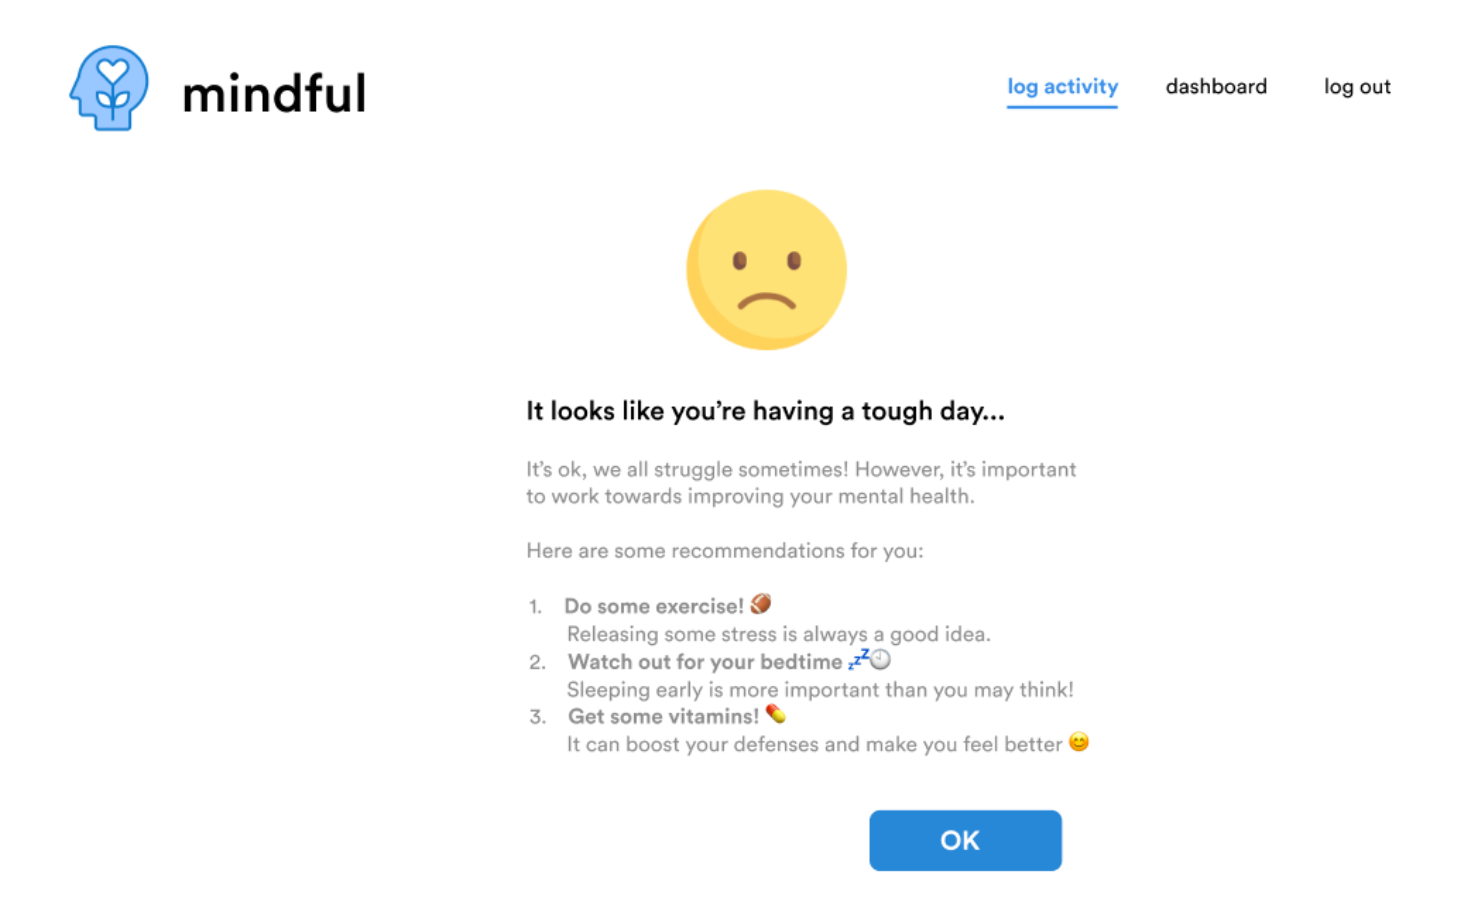

1) It’s normal to feel lonely sometimes, but it’s important to remember that there ARE people who care about us, and to keep in touch with them!
2) Are you getting your daily vitamins? Fruit is a very important part of our diet, and it’s delicious! 
3) Mindfulness and meditation can really help overcome stressful times.


In [22]:
##############################
# Example Person (2nd Time)
# RUN THIS CELL TO HAVE A GOOD TIME
##############################
example_person = X.iloc[[random.randint(0,len(X)-1)]]

if clf.predict(example_person.loc[:,:]) == 1:
    display(Image("bad.png"))
    example_diff = X_results_avg.iloc[[0]].reset_index().drop("results", axis=1).append(example_person).diff().iloc[1]
    weights_and_diff = pd.DataFrame(data=[feat_imp.values], columns=feat_imp.index).append(example_diff, sort=True)
    top_10_features = weights_and_diff.iloc[0].multiply(weights_and_diff.iloc[1]).abs().sort_values(ascending=False).head(10)
    i = 1
    for feat in top_10_features.index:
        if feat in responses:
            print(F"{i}) {responses[feat]}")
            i += 1
            
else:
    display(Image("good.png"))


### Cosine Similarity Tests

In [23]:
AVG_POS = X_results_avg.loc[1, :]
AVG_NEG = X_results_avg.loc[0, :]
def dot(A,B):
    return (sum(a*b for a,b in zip(A,B)))
def cosine_similarity(a,b):
    return dot(a,b) / (1+( (dot(a,a) **.5) * (dot(b,b) ** .5) ))
def cosine_compare_pos(row):
    return cosine_similarity(row, AVG_POS)
def cosine_compare_neg(row):
    return cosine_similarity(row, AVG_NEG)
def cosine_ratio_pos(row):
    return cosine_similarity(row, AVG_POS) / (cosine_similarity(row, AVG_NEG) + cosine_similarity(row, AVG_POS))

In [24]:
X_results[X_results["results"] == 0].drop("results", axis=1).apply(cosine_compare_neg, axis=1).mean()

0.8204057777273656

In [25]:
X_results[X_results["results"] == 1].drop("results", axis=1).apply(cosine_compare_pos, axis=1).mean()

0.8031291904699552

In [26]:
cosine_similarity(X.loc[10, :], AVG_NEG) / (cosine_similarity(X.loc[10, :], AVG_NEG) + cosine_similarity(X.loc[10, :], AVG_POS))

0.5014347061039673

In [27]:
cos_sims = []
for i in range(len(X)):
    example_person = X.loc[i, :]
    pos_score = cosine_similarity(example_person, AVG_POS) / (cosine_similarity(example_person, AVG_NEG) + cosine_similarity(example_person, AVG_POS))
#     print(pos_score)
    cos_sims.append(pos_score)

import numpy as np

print(F" max and min: {max(cos_sims), min(cos_sims)}")
print(F" One standard deviation is: {np.sqrt(np.var(cos_sims))}")

 max and min: (0.5556585893802799, 0.4601047737908168)
 One standard deviation is: 0.008447543252644886


In [28]:
X_results[X_results["results"] == 0].drop("results", axis=1).apply(cosine_ratio_pos, axis=1).mean()

0.4969296554429389

In [29]:
X_results[X_results["results"] == 1].drop("results", axis=1).apply(cosine_ratio_pos, axis=1).mean()

0.5033541481830653